In [16]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

In [17]:
df = pd.read_csv("financial_transactions.csv")
print(df.head())

   transaction_id        date  customer_id   amount    type  \
0               1  26-10-2020          NaN      NaN  credit   
1               2  08-01-2020        466.0  1255.95  credit   
2               3  02-09-2019        110.0  7969.68   debit   
3               4  02-12-2020        142.0  2927.41  credit   
4               5  02-12-2020        944.0  4661.88   debit   

                                         description  
0                 Expect series shake art again our.  
1               Each left similar likely coach take.  
2  Direction wife job pull determine leader move ...  
3                    Agree reveal buy black already.  
4       Child relationship show college whom speech.  


In [18]:
df = df.dropna(subset=['customer_id'])
df['customer_id'] = df['customer_id'].astype(int)
df['amount'] = df['amount'].fillna(0)
print(df.head())

   transaction_id        date  customer_id   amount    type  \
1               2  08-01-2020          466  1255.95  credit   
2               3  02-09-2019          110  7969.68   debit   
3               4  02-12-2020          142  2927.41  credit   
4               5  02-12-2020          944  4661.88   debit   
5               6  25-04-2021          900  3649.68  credit   

                                         description  
1               Each left similar likely coach take.  
2  Direction wife job pull determine leader move ...  
3                    Agree reveal buy black already.  
4       Child relationship show college whom speech.  
5                                Century front item.  


In [19]:
customer_data = df.groupby("customer_id").agg(
    total_spent=("amount", "sum"),
    avg_transaction=("amount", "mean"),
    num_transactions=("amount", "count")
).reset_index()
print(customer_data.head())

   customer_id  total_spent  avg_transaction  num_transactions
0            1    481760.83      4966.606495                97
1            2    493403.13      4699.077429               105
2            3    547765.88      5071.906296               108
3            4    505827.29      5558.541648                91
4            5    527998.55      4934.565888               107


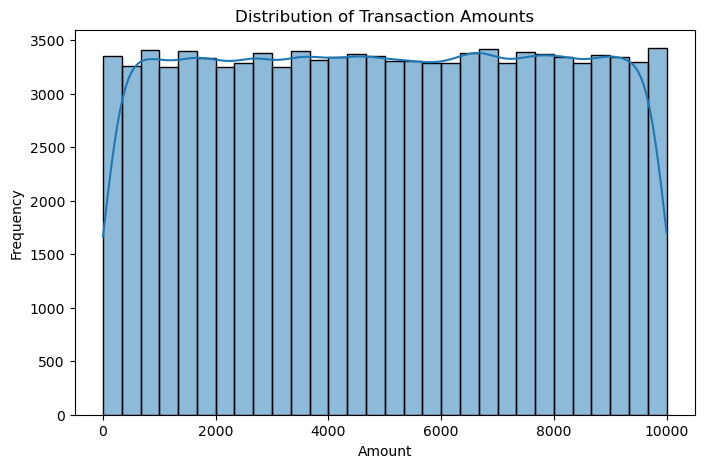

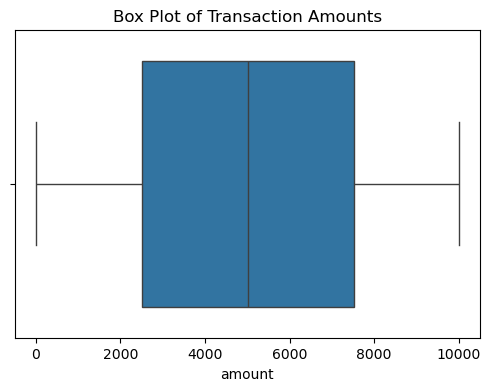

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.histplot(df['amount'], bins=30, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['amount'])
plt.title('Box Plot of Transaction Amounts')
plt.show()

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(customer_data[["total_spent", "avg_transaction", "num_transactions"]])

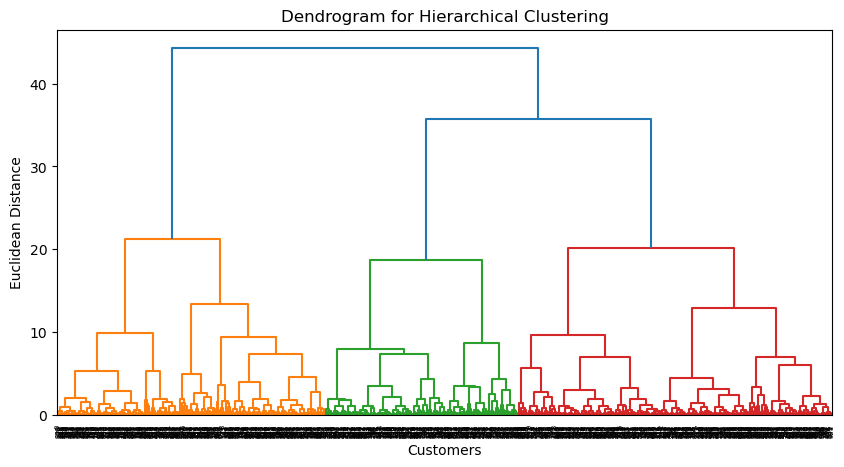

In [22]:
plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()

In [23]:
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
customer_data["cluster"] = hc.fit_predict(X_scaled)

In [24]:
cluster_summary = customer_data.groupby("cluster").agg(
    avg_total_spent=("total_spent", "mean"),
    avg_transaction_value=("avg_transaction", "mean"),
    avg_num_transactions=("num_transactions", "mean"),
    customer_count=("customer_id", "count")
).reset_index()

In [25]:


# Display customer details along with their assigned cluster
print(customer_data[["customer_id", "total_spent", "avg_transaction", "num_transactions", "cluster"]])


     customer_id  total_spent  avg_transaction  num_transactions  cluster
0              1    481760.83      4966.606495                97        0
1              2    493403.13      4699.077429               105        0
2              3    547765.88      5071.906296               108        1
3              4    505827.29      5558.541648                91        1
4              5    527998.55      4934.565888               107        2
..           ...          ...              ...               ...      ...
995          996    445988.18      4744.555106                94        0
996          997    495530.38      5005.357374                99        1
997          998    460563.98      5355.395116                86        1
998          999    513823.67      5466.209255                94        1
999         1000    529241.20      5040.392381               105        1

[1000 rows x 5 columns]


Available columns: Index(['customer_id', 'total_spent', 'avg_transaction', 'num_transactions',
       'cluster'],
      dtype='object')


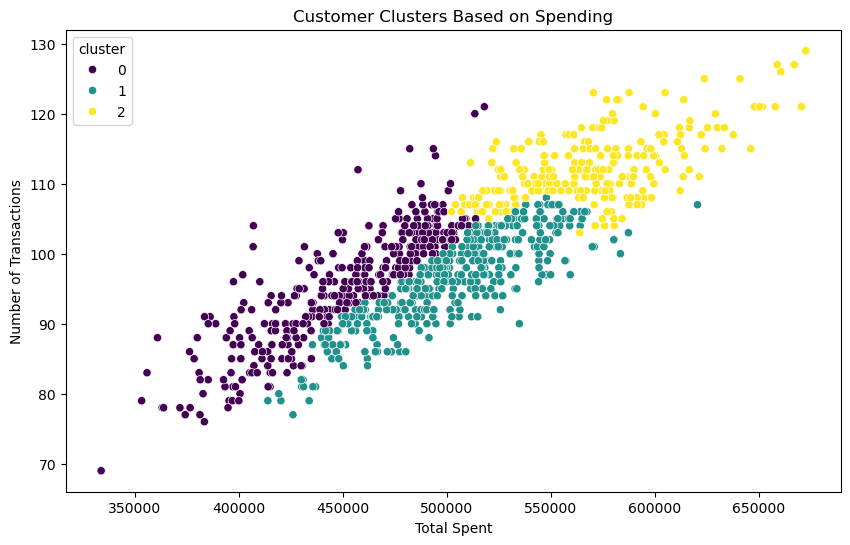

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
# Check available columns
print("Available columns:", customer_data.columns)
y_column = 'num_transactions'

# Scatter plot to visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=customer_data['total_spent'],
    y=customer_data[y_column],
    hue=customer_data['cluster'],
    palette="viridis"
)
plt.xlabel("Total Spent")
plt.ylabel("Number of Transactions")
plt.title("Customer Clusters Based on Spending")
plt.show()


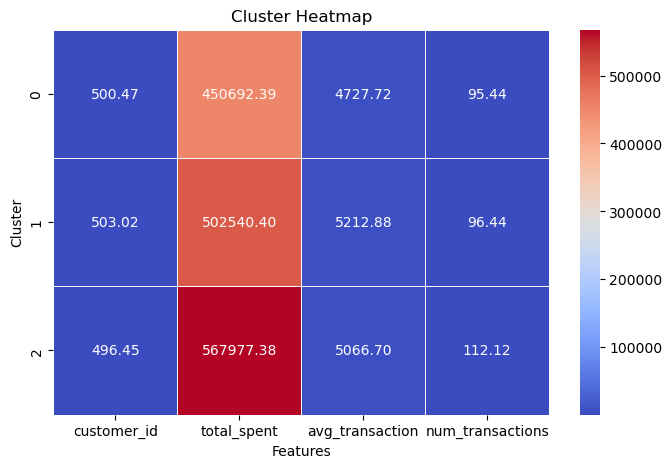

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the cluster-wise average values
cluster_summary = customer_data.groupby("cluster").mean()

# Plot the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(cluster_summary, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Labels
plt.title("Cluster Heatmap")
plt.xlabel("Features")
plt.ylabel("Cluster")

# Show the heatmap
plt.show()


In [28]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
silhouette = silhouette_score(X_scaled, customer_data["cluster"])
calinski_harabasz = calinski_harabasz_score(X_scaled, customer_data["cluster"])
davies_bouldin = davies_bouldin_score(X_scaled, customer_data["cluster"])
accuracy_score = (silhouette + 1) * 50 
print(f"Silhouette Score: {silhouette:.4f} (Higher is better)")
print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f} (Higher is better)")
print(f"Davies-Bouldin Index: {davies_bouldin:.4f} (Lower is better)")
print(f"Estimated Clustering Accuracy: {accuracy_score:.2f}%")


Silhouette Score: 0.2935 (Higher is better)
Calinski-Harabasz Index: 584.7588 (Higher is better)
Davies-Bouldin Index: 1.0864 (Lower is better)
Estimated Clustering Accuracy: 64.68%
